In [32]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [33]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=5.)
print(x)

tf.Tensor(
[[0.6115969]
 [0.528922 ]
 [0.6334795]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[4.3279247]
 [3.3910804]
 [2.1791208]], shape=(3, 1), dtype=float32)


In [34]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [35]:
x

array([[0., 1.],
       [1., 1.]])

In [36]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(f'random tensor :\n {v}')

v.assign(tf.ones((3, 1)))
print(f'ones tensor :\n {v}')

v[0, 0].assign(3.)
print(f'modify tensor[0,0]:\n{v}')

v.assign_add(tf.ones((3, 1)))
print(f'add other tensor to v add(ones,v):\n{v}')

random tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.489175  ],
       [ 0.9880599 ],
       [ 0.43104064]], dtype=float32)>
ones tensor :
 <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
modify tensor[0,0]:
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
add other tensor to v add(ones,v):
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [37]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b) # 矩陣相乘
e *= 2 # 乘係數
print(f'a:{a}\n b:{b}\nc:{c}\nd:{d}\ne:{e}')

a:[[1. 1.]
 [1. 1.]]
 b:[[1. 1.]
 [1. 1.]]
c:[[1. 1.]
 [1. 1.]]
d:[[2. 2.]
 [2. 2.]]
e:[[4. 4.]
 [4. 4.]]


In [38]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var) 
# result = x^2
gradient = tape.gradient(result, input_var)
# 對 x^2微分 x=3帶入
print(f'input:\n{input_var}\n gradient:\n{gradient}')

input:
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
 gradient:
6.0


In [39]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [40]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time) 
# x=2 4.9x
acceleration = outer_tape.gradient(speed, time)
# x=2 9.8
speed,acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=19.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

In [41]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
negative_samples.shape,negative_samples,positive_samples

((1000, 2),
 array([[ 0.24908848,  2.63180864],
        [ 0.51338684,  2.34900057],
        [-1.1331746 ,  1.23738241],
        ...,
        [-0.94790664,  2.202765  ],
        [-1.33212965,  1.70200504],
        [ 0.59449386,  3.31506141]]),
 array([[ 1.35293469, -0.91950341],
        [ 1.9762101 , -1.2716916 ],
        [ 3.59830732,  1.63027906],
        ...,
        [ 3.81170675,  1.98910098],
        [ 2.20149907, -0.20847018],
        [ 4.10875299, -1.50029384]]))

In [42]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(f'input size:{inputs.shape}\ninput data:{inputs}\n')
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)

input size:(2000, 2)
input data:[[ 0.24908848  2.6318088 ]
 [ 0.51338685  2.3490005 ]
 [-1.1331747   1.2373824 ]
 ...
 [ 3.8117068   1.9891009 ]
 [ 2.201499   -0.20847018]
 [ 4.108753   -1.5002939 ]]

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


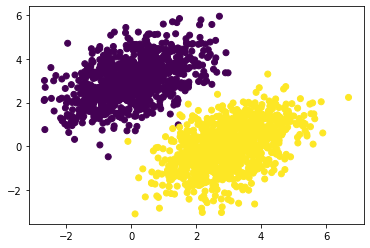

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()
# inputs[:,0] --> col=0 的所有row 
# inputs[:,1] --> col=1 的所有row
# c=targets[:, 0] 兩個顏色 c=color

In [44]:

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
c = tf.Variable(initial_value=tf.zeros(shape=(output_dim)))
b.shape,W.shape

(TensorShape([1]), TensorShape([2, 1]))

In [45]:

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


Loss at step 0: 3.6710
Loss at step 1: 0.6301
Loss at step 2: 0.2080
Loss at step 3: 0.1418
Loss at step 4: 0.1249
Loss at step 5: 0.1154
Loss at step 6: 0.1076
Loss at step 7: 0.1005
Loss at step 8: 0.0941
Loss at step 9: 0.0882
Loss at step 10: 0.0828
Loss at step 11: 0.0779
Loss at step 12: 0.0734
Loss at step 13: 0.0693
Loss at step 14: 0.0655
Loss at step 15: 0.0621
Loss at step 16: 0.0590
Loss at step 17: 0.0561
Loss at step 18: 0.0535
Loss at step 19: 0.0511
Loss at step 20: 0.0489
Loss at step 21: 0.0469
Loss at step 22: 0.0451
Loss at step 23: 0.0434
Loss at step 24: 0.0419
Loss at step 25: 0.0405
Loss at step 26: 0.0392
Loss at step 27: 0.0381
Loss at step 28: 0.0370
Loss at step 29: 0.0360
Loss at step 30: 0.0352
Loss at step 31: 0.0343
Loss at step 32: 0.0336
Loss at step 33: 0.0329
Loss at step 34: 0.0323
Loss at step 35: 0.0317
Loss at step 36: 0.0312
Loss at step 37: 0.0308
Loss at step 38: 0.0303
Loss at step 39: 0.0299


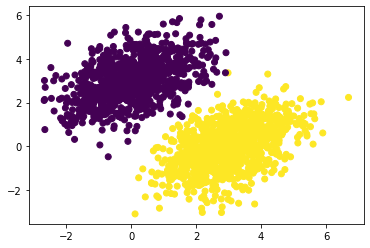

In [46]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

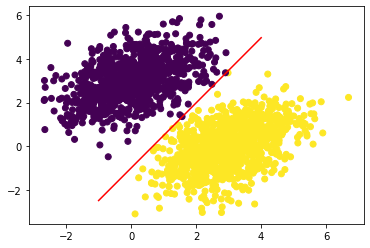

In [47]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [48]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [49]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [50]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [51]:
model = keras.Sequential([keras.layers.Dense(1)])


In [52]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [53]:

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [54]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
history.history

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 9.6677 - binary_accuracy: 0.3705
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 9.2913 - binary_accuracy: 0.3585
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 8.9775 - binary_accuracy: 0.3530
Epoch 4/5
16/16 [==============================] - 0s 927us/step - loss: 8.6766 - binary_accuracy: 0.3460
Epoch 5/5
16/16 [==============================] - 0s 981us/step - loss: 8.3862 - binary_accuracy: 0.3405


{'loss': [9.667671203613281,
  9.29125690460205,
  8.977498054504395,
  8.676579475402832,
  8.38622760772705],
 'binary_accuracy': [0.37049999833106995,
  0.35850000381469727,
  0.3529999852180481,
  0.34599998593330383,
  0.34049999713897705]}

In [55]:

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 2ms/step - loss: 0.3464 - binary_accuracy: 0.9371 - val_loss: 0.0303 - val_binary_accuracy: 0.9950
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0691 - binary_accuracy: 0.9500 - val_loss: 0.1217 - val_binary_accuracy: 0.9167
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0709 - binary_accuracy: 0.9564 - val_loss: 0.0287 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0722 - binary_accuracy: 0.9514 - val_loss: 0.0395 - val_binary_accuracy: 0.9967
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0684 - binary_accuracy: 0.9521 - val_loss: 0.0351 - val_binary_accuracy: 0.9950


In [56]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 1ms/step
[[1.0834429 ]
 [1.2244484 ]
 [1.2862926 ]
 [0.12209857]
 [0.84198743]
 [0.01217538]
 [0.06197667]
 [1.1417745 ]
 [0.13940799]
 [0.02062821]]


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


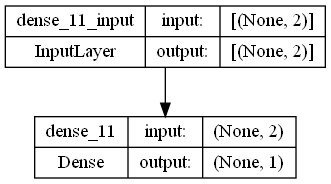

In [57]:
from tensorflow.keras.utils import plot_model
model.summary()

plot_model(model, 
    show_shapes= True,
    expand_nested=True
)
# plot_model??